# Introduccion de estadistica inferencial

In [0]:
import os
import sys
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from IPython.core.interactiveshell import InteractiveShell
import matplotlib
from pylab import *
import scipy.stats as stats

# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 

# Initialize a spark session.

conf = pyspark.SparkConf().setMaster("local[*]")
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Statistical Inferences with Pyspark") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
filename_data = 'dbfs:/FileStore/datos/train.csv'
df = spark.read.csv(filename_data, header=True)

# Load meta data file into pyspark data frame as well
print('Data frame type: {}'.format(type(df)))

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>


In [0]:
df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- MSSubClass: string (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: string (nullable = true)
 |-- OverallCond: string (nullable = true)
 |-- YearBuilt: string (nullable = true)
 |-- YearRemodAdd: string (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- Exteri

In [0]:
print('Columns & datatypes:')
DataFrame(df.dtypes, columns =['Column Name','Data type'])

Columns & datatypes:


,Column Name,Data type
0,Id,string
1,MSSubClass,string
2,MSZoning,string
3,LotFrontage,string
4,LotArea,string
...,...,...
76,MoSold,string
77,YrSold,string
78,SaleType,string
79,SaleCondition,string


In [0]:
print('Data frame describe (string and numeric columns only):')
df.describe().toPandas()

print('\nFisrt 2 data rows:')
df.limit(2).toPandas()

Data frame describe (string and numeric columns only):


,summary,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,count,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
1,mean,730.5,56.897260273972606,None,70.04995836802665,10516.828082191782,None,None,None,None,...,2.758904109589041,None,None,None,43.489041095890414,6.321917808219178,2007.8157534246575,None,None,180921.19589041095
2,stddev,421.6100093688479,42.30057099381045,None,24.28475177448321,9981.26493237915,None,None,None,None,...,40.17730694453021,None,None,None,496.1230244579441,2.7036262083595113,1.3280951205521145,None,None,79442.50288288663
3,min,1,120,C (all),100,10000,Grvl,Grvl,IR1,Bnk,...,0,Ex,GdPrv,Gar2,0,1,2006,COD,Abnorml,100000
4,max,999,90,RM,NA,9991,Pave,Pave,Reg,Lvl,...,738,NA,NA,TenC,8300,9,2010,WD,Partial,99900



Fisrt 2 data rows:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500


## A. Overview about data set size and summary

## Probabilidad Básica

* Empecemos con un ejemplo simple: Digamos que lanzamos una moneda justa

* Intuitivamente, hay un 50% de probabilidad de obtener cara, y un 50% de probabilidad de obtener cruz. Esto es porque solo hay dos posibles resultados, y cada evento es igualmente probable.

* Por lo tanto, podemos decir que la Probabilidad de obtener Cara es 0.5. De manera similar, la Probabilidad de obtener Cruz es 0.5

* La probabilidad puede describirse aproximadamente como **la posibilidad de que ocurra un evento o una secuencia de eventos**.

* **Experimento** - son las situaciones inciertas, que podrían tener múltiples resultados. Un lanzamiento de moneda es un experimento.

* **Resultado** es el producto de una sola prueba. Entonces, si cae cara, el resultado de nuestro experimento de lanzamiento de moneda es "Cara"

* **Evento** es uno o más resultados de un experimento. "Cruz" es uno de los posibles eventos para este experimento.

### Reglas

* La Probabilidad de que un evento ocurra con certeza es 1
* La Probabilidad de que un evento no ocurra definitivamente es 0
* La Probabilidad del complemento de un evento es 1 menos la probabilidad de ese evento.

* La probabilidad de que ocurra al menos 1 de 2 (o más) eventos que no pueden ocurrir simultáneamente (mutuamente excluyentes) es la suma de sus respectivas probabilidades

* **Mutuamente excluyente es un término estadístico que describe dos o más eventos que no pueden ocurrir simultáneamente. Por ejemplo, es imposible obtener un cinco y un tres en un solo dado al mismo tiempo.**

Para cualquier 2 eventos A & B, la probabilidad de que ocurra al menos uno es la suma de sus probabilidades individuales menos la probabilidad de su intersección. Es decir:

$$ P(A\cup B) = P(A) + P(B) - P(A\cap B) $$

Ejemplo

La Fundación Nacional del Sueño informa que alrededor del 3% de la población estadounidense tiene problemas de respiración durante el sueño. También informan que alrededor del 10% de la población estadounidense tiene síndrome de piernas inquietas. ¿Esto implica que el 13% de las personas tendrá al menos uno de estos problemas?

Respuesta: No, los eventos pueden ocurrir simultáneamente y por lo tanto no son mutuamente excluyentes. Para elaborar:

* **Veamos la Probabilidad de elegir una casa en el Vecindario - "OldTown"**


Número de casas en OldTown/Número total de casas
Vamos a hacer esto en Python

In [0]:
total_houses = df.count()
print("Total de casas en el vecindario :", total_houses)

Total de casas en el vecindario : 1460


In [0]:
casas_oldtown = df.filter(col('Neighborhood') == 'OldTown').count()
print("Número Total de Casas en Old Town:", casas_oldtown)

Número Total de Casas en Old Town: 113


In [0]:
probability = casas_oldtown / total_houses

print(f"Probabilidad de elegir una casa en OldTown: {probability:.4f}")

Probabilidad de elegir una casa en OldTown: 0.0774


## Probabilidad Condicional

* Hay 10 caramelos en una bolsa: 5 verdes y 5 azules.

* ¿Cuál es la probabilidad de obtener 3 caramelos azules seguidos?

* La probabilidad de obtener el primer caramelo azul es 5/10, o 1/2.

Cuando tomamos un caramelo azul, lo removemos de la bolsa. Nos quedamos con 9 caramelos en total con (5-1 =)4 azules.
Entonces la probabilidad de obtener otro azul es 4/9.
De manera similar, la probabilidad de elegir un tercer caramelo azul es 3/8

Como estamos calculando la probabilidad de elegir 1 Caramelo Azul Y 1 Caramelo Azul Y 1 Caramelo Azul

* Nuestra probabilidad final es **1/2 * 4/9 * 3/8, o .0833**. Entonces, hay un 8.3% de probabilidad de elegir tres caramelos azules seguidos.
Trucos simples: Siempre que tengas que decir verbalmente Y (como acabamos de hacer arriba), querrás MULTIPLICAR las probabilidades.
Siempre que tengas que decir verbalmente O, querrás SUMAR las probabilidades.

**DADO que tenemos la probabilidad de elegir una casa en el vecindario "OldTown", ¿vamos un paso más allá y NUEVAMENTE elegimos una casa del MISMO vecindario?**

In [0]:
# Cálculo de probabilidad condicional
total_casas = df.count()  # Todas las casas
casas_oldtown = df.filter(col('Neighborhood') == 'OldTown').count()  # Casas en OldTown

prob_condicional = (casas_oldtown/total_casas) * ((casas_oldtown - 1)/(total_casas - 1))

print("La Probabilidad de Elegir una Casa en Old Town y nuevamente elegir una casa del mismo vecindario es {0:.9f}%".
      format(prob_condicional*100))

La Probabilidad de Elegir una Casa en Old Town y nuevamente elegir una casa del mismo vecindario es 0.594139352%


## Distribución de probabilidad simple

* Tomemos un ejemplo, donde lanzamos tres monedas.
* así que, el número total de Combinaciones = 2*2*2 = 8

Veamos las probabilidades de obtener caras:

0 Caras {(Cruz,Cruz,Cruz)} => 1/8

1 Cara {(Cara,Cruz,Cruz),(Cruz,Cara,Cruz),(Cruz,Cruz,Cara)} => 3/8

2 Caras {(Cara,Cara,Cruz),(Cara,Cruz,Cara),(Cruz,Cara,Cara)} => 3/8

3 Caras {(Cara,Cara,Cara)} => 1/8

## PDF y PMF (Función de Densidad de Probabilidad y Función de Masa de Probabilidad)

* La distribución de probabilidad para una variable aleatoria discreta es la **función de masa de probabilidad** para esa variable y, de manera similar, si nuestra variable aleatoria toma valores continuos, la distribución se llama **función de densidad de probabilidad**.

* En el ejemplo anterior, lo que graficamos fue la Función de Masa de Probabilidad de una Variable Aleatoria Discreta (X que es la suma de dos dados justos)

* Una de las Funciones de Distribución de Probabilidad más comunes es la Distribución Normal.

## Distribución Normal

* La distribución normal, también conocida como distribución gaussiana, es una distribución de probabilidad que es simétrica alrededor de la media, mostrando que los datos cercanos a la media son más frecuentes en ocurrencia que los datos alejados de la media. En forma de gráfico, la distribución normal aparecerá como una curva en forma de campana.

### Verificando la Asimetría de los datos

* Generalmente verificamos la Asimetría en las Columnas Objetivo de los datos.
* La Asimetría es un estado de distribución donde la distribución está altamente sesgada hacia el lado derecho o izquierdo del gráfico.

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


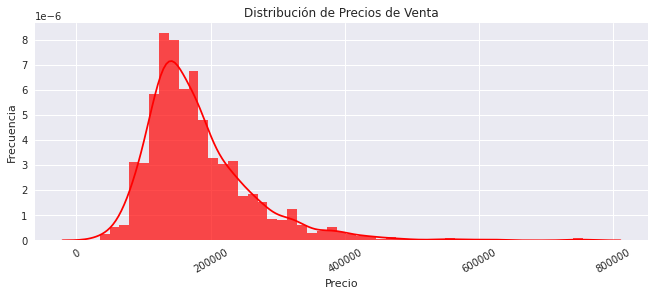

In [0]:
# Forma 1: Usando pandas y matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna SalePrice a pandas
df_pandas = df.select('SalePrice').toPandas()
plt.figure(figsize=(11, 4))
plt.style.use('seaborn')
sns.distplot(df_pandas['SalePrice'], color='red', hist_kws={'alpha':0.7})
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30)
plt.show();



* La distribución de nuestra variable objetivo (SalePrice) no se asemeja a una distribución normal, está sesgada hacia la derecha
* Si eliminamos los valores atípicos (outliers), se asemejaría más a una Distribución Normal

## Inferencia Estadística

* Este **subconjunto** de la población no es más que la Muestra de datos

* ¡Realizamos varias pruebas en la Muestra para obtener información sobre la población más grande!

* Por lo tanto, la inferencia estadística es el proceso de analizar datos de muestra para obtener información sobre la población de la cual se recolectaron los datos y para investigar diferencias entre diferentes muestras de datos.

## Teorema del Límite Central (TLC)

### Definición
El teorema del límite central es una teoría estadística fundamental que establece:

1. Para una población con varianza finita:
   * Si tomamos muestras suficientemente grandes
   * La media de todas estas muestras se aproximará a la media de la población

2. Características importantes:
   * Las muestras seguirán una distribución aproximadamente normal
   * La varianza de las muestras será ≈ varianza_población/tamaño_muestra
   * Funciona independientemente de la forma de la distribución original

### Implicaciones prácticas
* Permite hacer inferencias sobre una población a partir de muestras
* Base fundamental para muchas pruebas estadísticas
* Especialmente útil cuando la población original no sigue una distribución normal


Para tamaño de muestra 10:
Media de las medias muestrales: $179,536.21
Desviación estándar de las medias muestrales: $26,778.61

Para tamaño de muestra 30:
Media de las medias muestrales: $180,219.66
Desviación estándar de las medias muestrales: $14,556.37

Para tamaño de muestra 50:
Media de las medias muestrales: $183,595.25
Desviación estándar de las medias muestrales: $11,271.33


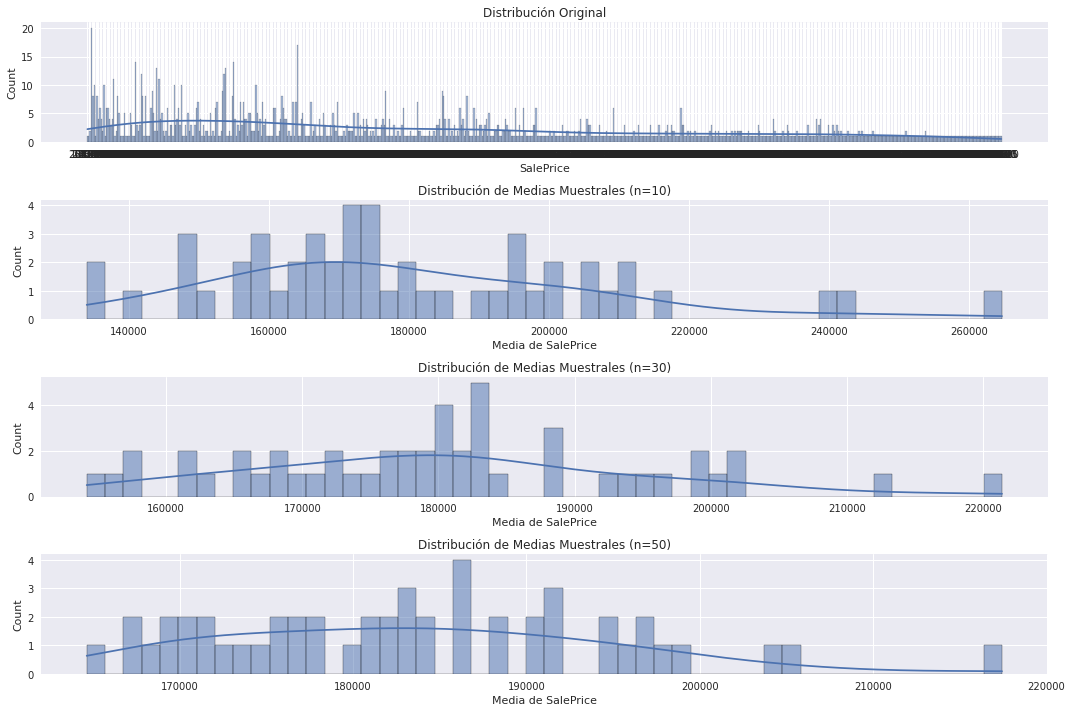

In [0]:
from pyspark.sql.functions import col, mean, stddev, expr
from pyspark.sql import Window
import numpy as np
import matplotlib.pyplot as plt

def demostrar_tlc_spark(df, columna, tamanos_muestra=[10, 30, 50], num_simulaciones=50):
    # Obtener estadísticas de la población
    stats = df.select(
        mean(col(columna)).alias('media_poblacion'),
        stddev(col(columna)).alias('std_poblacion')
    ).collect()[0]
    
    # Crear subplots
    fig = plt.figure(figsize=(15, 10))
    
    # Graficar distribución original
    plt.subplot(len(tamanos_muestra) + 1, 1, 1)
    df_pandas = df.select(columna).toPandas()
    sns.histplot(df_pandas[columna], bins=50, kde=True)
    plt.title('Distribución Original')
    plt.xlabel(columna)
    
    # Para cada tamaño de muestra
    for idx, n in enumerate(tamanos_muestra, 1):
        medias_muestrales = []
        
        # Realizar simulaciones
        for _ in range(num_simulaciones):
            # Tomar muestra y calcular media
            muestra = df.sample(False, fraction=n/df.count(), seed=np.random.randint(1000))
            media_muestra = muestra.select(mean(col(columna))).collect()[0][0]
            medias_muestrales.append(media_muestra)
        
        # Graficar distribución de medias muestrales
        plt.subplot(len(tamanos_muestra) + 1, 1, idx + 1)
        sns.histplot(medias_muestrales, bins=50, kde=True)
        plt.title(f'Distribución de Medias Muestrales (n={n})')
        plt.xlabel(f'Media de {columna}')
        
        # Mostrar estadísticas
        print(f"\nPara tamaño de muestra {n}:")
        print(f"Media de las medias muestrales: ${np.mean(medias_muestrales):,.2f}")

        print(f"Desviación estándar de las medias muestrales: ${np.std(medias_muestrales):,.2f}")
    
    plt.tight_layout()
    plt.show()
    plt.close()

# Usar la función
demostrar_tlc_spark(
    df=df,
    columna='SalePrice',
    tamanos_muestra=[10, 30, 50],
    num_simulaciones=50
)

En los gráficos mostrados, la curva azul representa la distribución Gaussiana predicha por el Teorema del Límite Central. Podemos observar que la distribución original muestra la distribución completa de los precios de venta (SalePrice) y no sigue una distribución normal perfecta. Las distribuciones de medias muestrales se muestran para diferentes tamaños de muestra (n=10, n=30, n=50). Conforme aumenta el tamaño de la muestra (n), la distribución se vuelve más "normal" o gaussiana, el ancho de la distribución se reduce (siguiendo $1/\sqrt{n}$) y la media se mantiene aproximadamente igual a la distribución original. Es importante notar que la velocidad de convergencia hacia una distribución normal depende de la distribución original, con n=50 la distribución ya muestra una forma más cercana a la normal, y la línea azul (curva de densidad) se suaviza más con muestras más grandes.

## Intervalo de Confianza

| <img src="https://fineproxy.org/wp-content/uploads/2023/05/Confidence-interval-1536x906.jpg" style="transform: scale(2);" alt="Intervalo de Confianza"> |
|:---------------------------------------------------------------------------------------------------------------------------------------------------:|

El **Intervalo de Confianza (IC)** es un tipo de estimación calculada a partir de las estadísticas de los datos observados. Este propone un rango de valores plausibles para un parámetro desconocido (por ejemplo, la media). El intervalo tiene un nivel de confianza asociado de que el verdadero parámetro se encuentra en el rango propuesto.

El intervalo de confianza del 95% define un rango de valores del cual puedes estar 95% seguro que contiene la media poblacional. Con muestras grandes, conoces la media con mucha más precisión que con una muestra pequeña, por lo que el intervalo de confianza es bastante estrecho cuando se calcula a partir de una muestra grande.

In [0]:
from pyspark.sql.functions import mean, stddev, col
import scipy.stats as stats
import math
import numpy as np

# Establecer semilla para reproducibilidad
np.random.seed(10)

# Calcular estadísticas de la población
stats_df = df.select(
   mean('SalePrice').alias('media_poblacion'),
   stddev('SalePrice').alias('desv_std_poblacion')
).collect()[0]

# Tomar una muestra
tamano_muestra = 1000
muestra = df.sample(False, fraction=tamano_muestra/df.count(), seed=42)
media_muestra = muestra.select(mean('SalePrice')).collect()[0][0]

# Obtener el valor z-crítico para 95% de confianza
z_critico = stats.norm.ppf(q = 0.95)
print("Valor z-crítico:", z_critico)

# Obtener la desviación estándar poblacional
desv_std_poblacion = stats_df['desv_std_poblacion']

# Calcular el margen de error
margen_error = z_critico * (desv_std_poblacion/math.sqrt(tamano_muestra))

# Definir el intervalo de confianza
intervalo_confianza = (media_muestra - margen_error, 
                     media_muestra + margen_error)

# Imprimir resultados
print("\nIntervalo de confianza:", intervalo_confianza)
print("Media verdadera: ${:,.2f}".format(stats_df['media_poblacion']))
print(f"Límite inferior: ${intervalo_confianza[0]:,.2f}")
print(f"Límite superior: ${intervalo_confianza[1]:,.2f}")
print(f"Margen de error: ${margen_error:,.2f}")

Valor z-crítico: 1.6448536269514722

Intervalo de confianza: (177726.78054347626, 185991.1585041428)
Media verdadera: $180,921.20
Límite inferior: $177,726.78
Límite superior: $185,991.16
Margen de error: $4,132.19


* Notar que la media verdadera está contenida en nuestro intervalo.
* Un intervalo de confianza del 95% significa que si tomamos muchas muestras y creamos intervalos de confianza para cada una de ellas, el 95% de los intervalos de confianza de nuestras muestras contendrán la verdadera media poblacional.
* Ahora, vamos a crear varios intervalos de confianza y graficarlos para tener una mejor idea de lo que significa "capturar" la verdadera media

Out[21]: <Figure size 936x648 with 0 Axes>Out[21]: <ErrorbarContainer object of 3 artists>Out[21]: <matplotlib.collections.LineCollection at 0x7f871986e550>Out[21]: Text(0.5, 1.0, 'Intervalos de Confianza para 25 Pruebas')Out[21]: Text(0.5, 0, 'Número de Prueba')Out[21]: Text(0, 0.5, 'Precio de Venta')Out[21]: <matplotlib.legend.Legend at 0x7f8738d45a60>

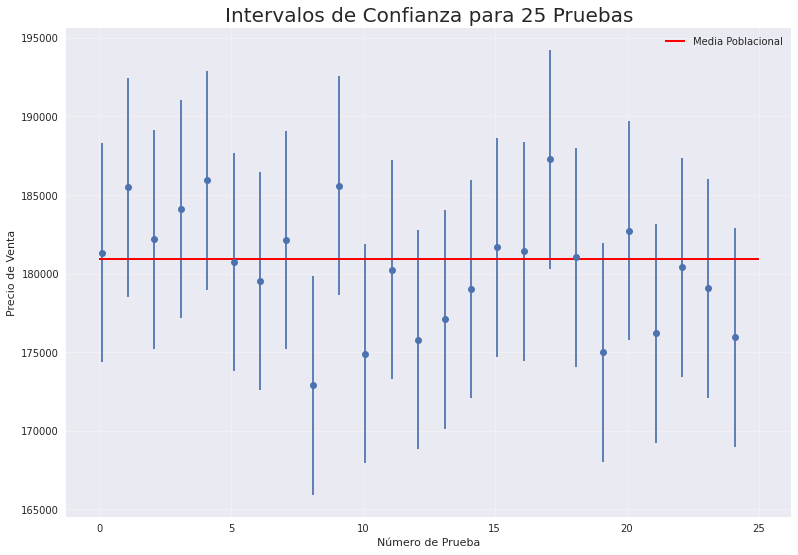


Intervalos que capturan la media poblacional: 24/25
Porcentaje de captura: 96.0%
Media poblacional: $180,921.20


<command-3265217263431444>:65: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  capturas = sum(1 for inf, sup in intervalos if inf <= media_poblacion <= sup)


In [0]:
import numpy as np
from pyspark.sql.functions import mean, stddev, col
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Configurar semilla para reproducibilidad
np.random.seed(12)

# Parámetros
tamano_muestra = 500
num_pruebas = 25

# Obtener estadísticas de la población
stats_df = df.select(
   mean('SalePrice').alias('media_poblacion'),
   stddev('SalePrice').alias('desv_std_poblacion')
).collect()[0]

media_poblacion = stats_df['media_poblacion']
desv_std_poblacion = stats_df['desv_std_poblacion']

# Listas para almacenar resultados
intervalos = []
medias_muestrales = []

# Calcular intervalos de confianza
for i in range(num_pruebas):
   # Tomar muestra
   muestra = df.sample(False, fraction=tamano_muestra/df.count(), seed=i)
   media_muestra = muestra.select(mean('SalePrice')).collect()[0][0]
   medias_muestrales.append(media_muestra)
   
   # Calcular intervalo de confianza
   z_critico = stats.norm.ppf(q = 0.975)
   margen_error = z_critico * (desv_std_poblacion/math.sqrt(tamano_muestra))
   intervalo = (media_muestra - margen_error, media_muestra + margen_error)
   intervalos.append(intervalo)

# Crear visualización
plt.figure(figsize=(13, 9))

# Graficar intervalos de confianza
plt.errorbar(x=np.arange(0.1, num_pruebas, 1), 
            y=medias_muestrales, 
            yerr=[(sup-inf)/2 for inf,sup in intervalos],
            fmt='o')

# Agregar línea de media poblacional
plt.hlines(xmin=0, 
          xmax=num_pruebas,
          y=media_poblacion, 
          linewidth=2.0,
          color="red",
          label='Media Poblacional')

plt.title('Intervalos de Confianza para 25 Pruebas', fontsize=20)
plt.xlabel('Número de Prueba')
plt.ylabel('Precio de Venta')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Mostrar estadísticas
capturas = sum(1 for inf, sup in intervalos if inf <= media_poblacion <= sup)
print(f"\nIntervalos que capturan la media poblacional: {capturas}/{num_pruebas}")
print(f"Porcentaje de captura: {(capturas/num_pruebas)*100:.1f}%")
print(f"Media poblacional: ${media_poblacion:,.2f}")

* Es fácilmente visible que el 95% de las veces las líneas azules (la media muestral) se superponen con la línea roja (la media verdadera), además se espera que el 5% de las veces no se superpongan con la línea roja (la media verdadera).